In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [16]:
data = pd.read_excel('data/new_car_data.xlsx')
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,med,5more,4,big,med,acc
1,low,high,3,more,big,high,vgood
2,med,high,2,4,big,med,acc
3,med,low,5more,4,small,high,good
4,med,low,3,more,med,med,good
...,...,...,...,...,...,...,...
145,high,high,3,more,big,high,acc
146,low,med,3,4,big,high,vgood
147,high,high,4,more,big,low,unacc
148,low,low,3,more,big,med,good


In [17]:
X = data.drop(['class'], axis=1)
y = data['class']

In [18]:
# import category_encoders as ce

encoder = OrdinalEncoder()
X = encoder.fit_transform(X)
X

array([[3., 2., 3., 1., 0., 2.],
       [1., 0., 1., 2., 0., 0.],
       [2., 0., 0., 1., 0., 2.],
       [2., 1., 3., 1., 2., 0.],
       [2., 1., 1., 2., 1., 2.],
       [1., 2., 3., 2., 0., 0.],
       [2., 3., 2., 2., 0., 2.],
       [1., 2., 3., 1., 1., 0.],
       [1., 1., 1., 2., 1., 2.],
       [1., 1., 1., 1., 2., 2.],
       [1., 2., 1., 1., 1., 0.],
       [1., 1., 3., 2., 0., 2.],
       [1., 2., 0., 1., 0., 2.],
       [2., 2., 2., 2., 1., 2.],
       [2., 1., 3., 2., 0., 0.],
       [1., 1., 0., 1., 1., 0.],
       [0., 1., 3., 2., 1., 0.],
       [1., 1., 2., 1., 0., 2.],
       [3., 2., 0., 0., 2., 0.],
       [1., 1., 1., 1., 2., 0.],
       [2., 3., 1., 2., 2., 2.],
       [1., 1., 1., 0., 0., 2.],
       [2., 3., 2., 2., 0., 0.],
       [1., 1., 3., 1., 0., 0.],
       [1., 3., 2., 2., 2., 2.],
       [2., 3., 1., 1., 2., 0.],
       [0., 1., 3., 1., 2., 2.],
       [0., 3., 2., 2., 0., 2.],
       [1., 1., 2., 2., 0., 0.],
       [1., 1., 2., 1., 1., 2.],
       [1.

In [19]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5
0,1.000000,0.666667,1.000000,0.5,0.0,1.0
1,0.333333,0.000000,0.333333,1.0,0.0,0.0
2,0.666667,0.000000,0.000000,0.5,0.0,1.0
3,0.666667,0.333333,1.000000,0.5,1.0,0.0
4,0.666667,0.333333,0.333333,1.0,0.5,1.0
...,...,...,...,...,...,...
145,0.000000,0.000000,0.333333,1.0,0.0,0.0
146,0.333333,0.666667,0.333333,0.5,0.0,0.0
147,0.000000,0.000000,0.666667,1.0,0.0,0.5
148,0.333333,0.333333,0.333333,1.0,0.0,1.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X Train: ', X_train.shape)
print('X Test: ', X_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

X Train:  (120, 6)
X Test:  (30, 6)
y train:  (120,)
y test:  (30,)


## Using Gaussian Naive Bayes

In [21]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Nilai akurasi: ', acc)

Nilai akurasi:  0.5333333333333333


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       1.00      0.38      0.55         8
        good       0.67      0.40      0.50        10
       unacc       0.80      0.57      0.67         7
       vgood       0.31      1.00      0.48         5

    accuracy                           0.53        30
   macro avg       0.69      0.59      0.55        30
weighted avg       0.73      0.53      0.55        30



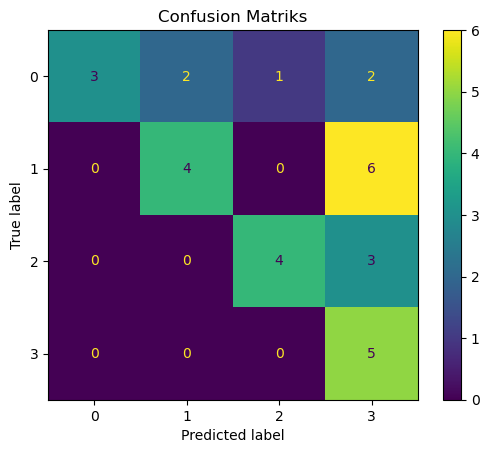

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.title('Confusion Matriks')
plt.show()

In [25]:
print(cm)

[[3 2 1 2]
 [0 4 0 6]
 [0 0 4 3]
 [0 0 0 5]]


In [26]:
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 30 points : 14


## Using Hyperparameter Tuning Model

In [39]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}


tuning_model = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=5, n_jobs=-1)
tuning_model.fit(X_train, y_train)
print(tuning_model.best_estimator_)
# model.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.1)


In [40]:
tuning_y_pred = tuning_model.predict(X_test)
acc = accuracy_score(y_test, tuning_y_pred)
print('Nilai Akurasi dengan model yang dituning: ', acc)

Nilai Akurasi dengan model yang dituning:  0.7333333333333333


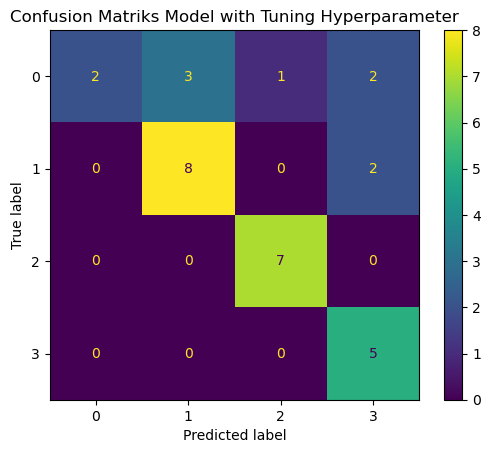

In [41]:
tuning_cm = confusion_matrix(y_test, tuning_y_pred)
tuning_cm_display = ConfusionMatrixDisplay(confusion_matrix=tuning_cm)
tuning_cm_display.plot()
plt.title('Confusion Matriks Model with Tuning Hyperparameter')
plt.show()

In [42]:
print("Number of mislabeled points out of a total %d points at hyperparameter tuning model : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 30 points at hyperparameter tuning model : 14


In [43]:
print(classification_report(y_test, tuning_y_pred))

              precision    recall  f1-score   support

         acc       1.00      0.25      0.40         8
        good       0.73      0.80      0.76        10
       unacc       0.88      1.00      0.93         7
       vgood       0.56      1.00      0.71         5

    accuracy                           0.73        30
   macro avg       0.79      0.76      0.70        30
weighted avg       0.81      0.73      0.70        30



In [46]:
# new_data_input = (1, 0, 2, 0, 1, 0)
# new_data = np.asarray(new_data_input)

# new_data_reshaped = new_data.reshape(1, -1)
# new_pred = tuning_model.predict(new_data_reshaped)
# print(new_pred)